<a href="https://colab.research.google.com/github/MateusMacul/colab_JuPyter_API_Google/blob/master/Exemplo_inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install earthengine-api

     |████████████████████████████████| 153kB 4.6MB/s 
  Created wheel for earthengine-api: filename=earthengine_api-0.1.202-cp36-none-any.whl size=174738 sha256=8a91d2a7f4e086bee7f0cd7ce0ebde592b51b048b8b7741f36fb999136fcc9fb
  Stored in directory: /root/.cache/pip/wheels/7b/c5/a7/ac27c1a5bebbaf335cd6805056827b4bf1c665e05ad3d40cee
Successfully built earthengine-api


In [2]:
# Import the Earth Engine library.
import ee

# Trigger the authentication flow.
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/rwFMy1AFuQ11Cd6kJXtt4Z2A_dhkZkfcwAxx_0YtIGVcetArDIz8now

Successfully saved authorization token.


In [3]:
# Initialize the library.
ee.Initialize()

# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


In [4]:
# Import libraries.
import ee
from IPython.display import Image

# Initialize the Earth Engine library.
ee.Initialize()

# Display a thumbnail of a sample image asset.
Image(url=ee.Image('USGS/SRTMGL1_003').getThumbUrl({'min': 0, 'max': 3000}))

In [5]:
# Import libraries.
import ee
import folium

# Initialize the Earth Engine library.
ee.Initialize()

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, eeImageObject, visParams, name):
  mapID = ee.Image(eeImageObject).getMapId(visParams)
  folium.raster_layers.TileLayer(
    tiles = "https://earthengine.googleapis.com/map/"+mapID['mapid']+
      "/{z}/{x}/{y}?token="+mapID['token'],
    attr = "Map Data © Google Earth Engine",
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Fetch an elevation model.
dem = ee.Image('USGS/SRTMGL1_003')

# Set visualization parameters.
visParams = {'min':0, 'max':3000, 'palette':['225ea8','41b6c4','a1dab4','ffffcc']}

# Create a folium map object.
myMap = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add the elevation model to the map object.
myMap.add_ee_layer(dem, visParams, 'DEM')

# Add a layer control panel to the map.
myMap.add_child(folium.LayerControl())

# Display the map.
display(myMap)

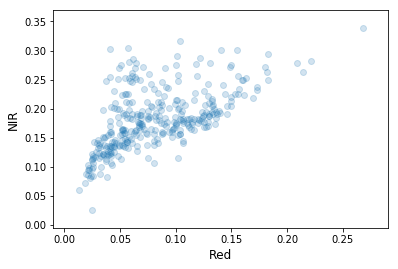

In [6]:
# Import libraries.
import ee
import matplotlib.pyplot as plt

# Initialize the Earth Engine module.
ee.Initialize()

# Fetch a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Select Red and NIR bands, scale them, and sample 500 points.
sampFC = img.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
sampDict = sampFC.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
sampList = ee.List(sampDict.get('list'))

# Save server-side ee.List as a client-side Python list.
sampData = sampList.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(sampData[0], sampData[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()